In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

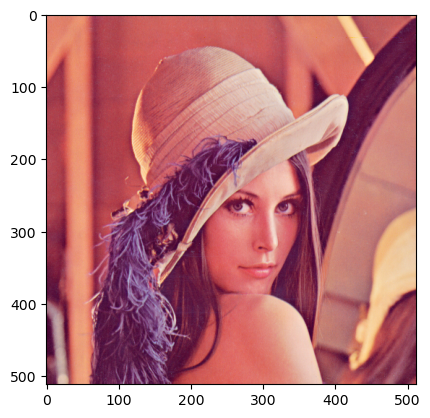

In [2]:
src = cv.imread("archives/test.png")
src = cv.cvtColor(src, cv.COLOR_BGR2RGB)
plt.imshow(src)

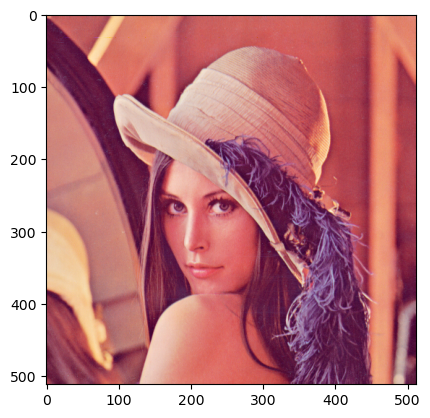

In [3]:
# voltear
flipped = cv.flip(src, 1) # 0 ó 1
plt.imshow(flipped)

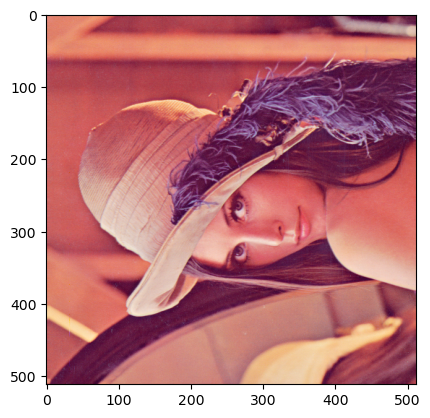

In [4]:
# trasponer
tr = cv.transpose(src) # 0 ó 1
plt.imshow(tr)

512 512
(512, 1024, 3)


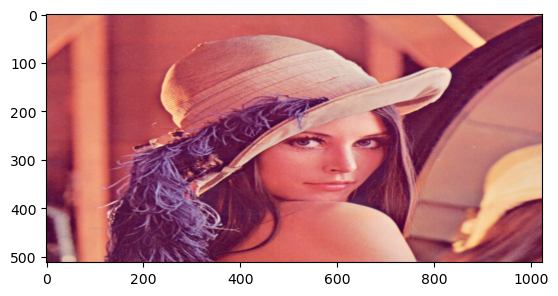

In [5]:
# escalado
print(src.shape[0], src.shape[1])
dst = cv.resize(src, (src.shape[0] * 2, src.shape[1]), interpolation=cv.INTER_CUBIC)
plt.imshow(dst)
print(dst.shape)

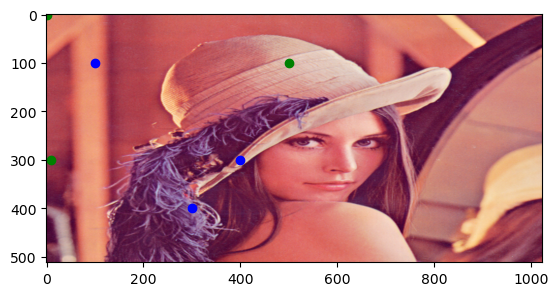

In [6]:
src1 = np.array([[0,0], [10, 300], [500, 100]]).astype(np.float32)
plt.scatter([src1[0][0], src1[1,0], src1[2,0]],
            [src1[0][1], src1[1,1], src1[2,1]], color="g")
src2 = np.array([[100, 100], [300, 400], [400, 300]]).astype(np.float32)
plt.scatter([src2[0][0], src2[1,0], src2[2,0]],
            [src2[0][1], src2[1,1], src2[2,1]], color="b")

plt.imshow(dst)

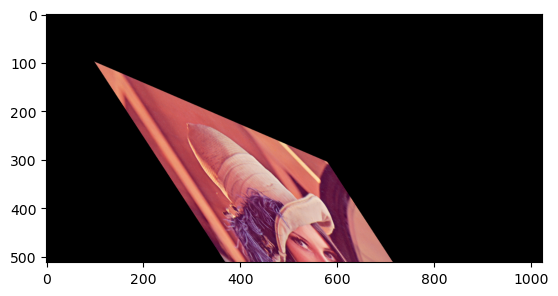

In [7]:
warp_mat = cv.getAffineTransform(src1, src2)
warp_dst = cv.warpAffine(dst, warp_mat, (dst.shape[1], dst.shape[0]))
plt.imshow(warp_dst)

[[  0.4330127    0.25       176.79491924]
 [ -0.25         0.4330127  213.39745962]]


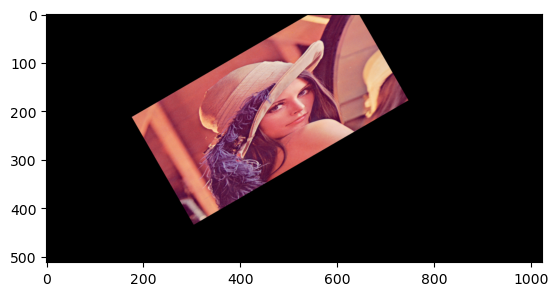

In [8]:
centro = (400, 200)
angulo = 30
scale = 0.5
rot_mat = cv.getRotationMatrix2D(centro, angulo, scale)
print(rot_mat)
rot_dst = cv.warpAffine(dst, rot_mat, (dst.shape[1], dst.shape[0]))
plt.imshow(rot_dst)

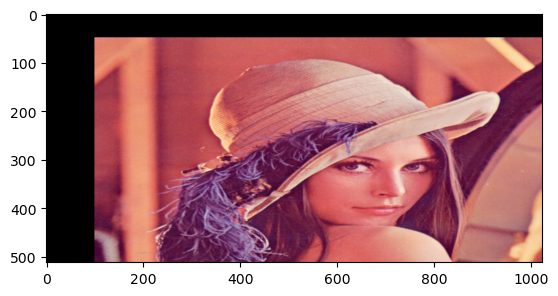

In [9]:
tx = 100
ty = 50
tra_mat = np.float32([[1,0,tx], [0,1,ty]])
tra_dst = cv.warpAffine(dst, tra_mat, (dst.shape[1], dst.shape[0]))
plt.imshow(tra_dst)

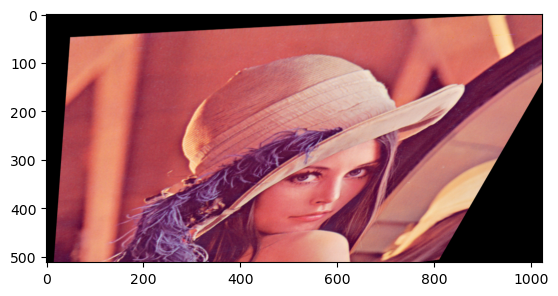

In [10]:
src1 = np.array([[0,0], [900, 0], [200, 400], [1000, 500]]).astype(np.float32)

src2 = np.array([[50, 50], [1000, 0], [200, 500], [800,500]]).astype(np.float32)
p_mat = cv.getPerspectiveTransform(src1, src2)
p_dst = cv.warpPerspective(dst, p_mat, (dst.shape[1], dst.shape[0]))

plt.imshow(p_dst)